In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [3]:
# Import data from CSV's
df = pd.read_csv('Resources/grocery_consumption_19_20.csv')
df.head(25)

,Grocery Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Cereals and bakery products,142349,139160,140742,141714,141374,142700,143963,144391,142633,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942
1,Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
2,Fish and seafood,13586,13216,13567,13808,13676,13909,14027,13986,13882,...,13826,13630,13633,17109,14597,15070,15109,15103,14857,14770
3,Milk dairy products and eggs,89712,88129,89066,89515,89484,89969,90692,90802,89287,...,88958,88590,88048,109224,92285,94312,94746,96189,93489,94164
4,Fats and oils,23724,23232,23513,23978,23663,23900,24337,24396,24194,...,24352,24033,24097,30268,26117,26721,26477,26602,26164,26235
5,Fresh fruits and vegetables,83285,81046,81457,82412,83093,84110,84757,84883,84974,...,85618,85193,85144,106379,92262,93807,92650,92934,91172,91742
6,Processed fruits and vegetables,30991,29927,30011,30430,30456,30551,30996,31034,30746,...,30499,30639,30674,38355,32704,33378,32978,33136,32600,32502
7,Sugar and sweets,47493,46588,46787,47761,47776,47296,47721,47710,46768,...,47554,46298,46657,55010,46998,47971,48736,49524,48475,48231
8,Food products not elsewhere classified,151454,147410,150119,150769,151744,151673,153970,153530,152588,...,153434,153724,151106,184953,157001,161062,160482,161763,158760,160188
9,Coffee tea and other beverage materials,17512,17122,17365,17435,17466,17398,17700,17700,17595,...,17729,17821,17620,21714,18745,19244,18977,19419,18990,19086


In [5]:
bev_df = df.loc[[df.index[9],df.index[10],df.index[11]]]
bev_df

,Grocery Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
9,Coffee tea and other beverage materials,17512,17122,17365,17435,17466,17398,17700,17700,17595,...,17729,17821,17620,21714,18745,19244,18977,19419,18990,19086
10,Mineral waters soft drinks and veget...,79929,78135,79089,80286,79990,81172,81997,82116,81365,...,81062,80450,80513,93803,77717,79528,80522,82449,81381,81962
11,Alcoholic beverages purchased for of...,136945,135327,137409,137883,137812,138454,138946,139186,138987,...,140646,140755,140676,165833,148111,157300,157851,157749,158567,158632


In [7]:
bev_df = bev_df.set_index(['Grocery Consumption Category '])
bev_df

,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Grocery Consumption Category,,,,,,,,,,,,,,,,,,,,,
Coffee tea and other beverage materials,17512,17122,17365,17435,17466,17398,17700,17700,17595,17666,...,17729,17821,17620,21714,18745,19244,18977,19419,18990,19086
Mineral waters soft drinks and vegetable juices,79929,78135,79089,80286,79990,81172,81997,82116,81365,81678,...,81062,80450,80513,93803,77717,79528,80522,82449,81381,81962
Alcoholic beverages purchased for off-premises consumption,136945,135327,137409,137883,137812,138454,138946,139186,138987,139374,...,140646,140755,140676,165833,148111,157300,157851,157749,158567,158632


In [9]:
bev_df.index

Index(['          Coffee tea and other beverage materials',
       '          Mineral waters soft drinks and vegetable juices',
       '          Alcoholic beverages purchased for off-premises consumption'],
      dtype='object', name='Grocery Consumption Category ')

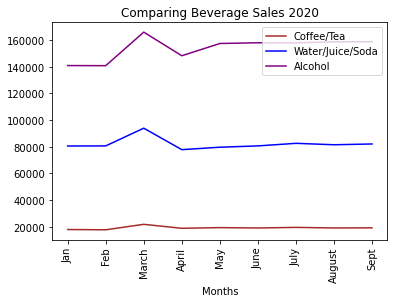

In [11]:
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

#graphing coffee vs mineral waters vs alcoholic bevs 2020
coffee, = plt.plot(months, bev_df.loc['          Coffee tea and other beverage materials',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="brown", label="Coffee/Tea")
water, = plt.plot(months, bev_df.loc['          Mineral waters soft drinks and vegetable juices',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="blue", label="Water/Juice/Soda")
alcohol, = plt.plot(months, bev_df.loc['          Alcoholic beverages purchased for off-premises consumption',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="purple", label="Alcohol")

# Create a legend for our chart
plt.legend(handles=[coffee,water,alcohol], loc="best")
plt.title("Comparing Beverage Sales 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

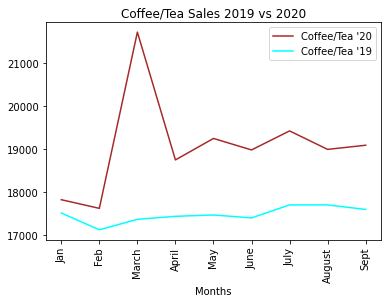

In [12]:
#comparing coffee 2020 to 2019 (skipping alcohol comparison atm as Siara is working with that data)

coffee20, = plt.plot(months, bev_df.loc['          Coffee tea and other beverage materials',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="brown", label="Coffee/Tea '20")

coffee19, = plt.plot(months, bev_df.loc['          Coffee tea and other beverage materials',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="cyan", label="Coffee/Tea '19")
# Create a legend for our chart
plt.legend(handles=[coffee20,coffee19], loc="best")
plt.title("Coffee/Tea Sales 2019 vs 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
#2020 at home coffee sales are significantly higher, spike aside, than 2019s. Likely because more people are making their coffee
#and tea drinks at home instead of at work or purchasing from a coffee shop.

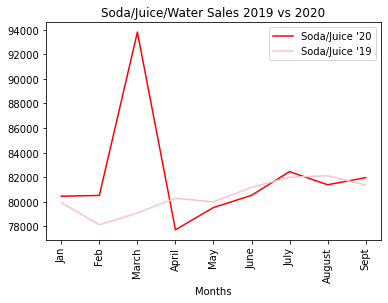

In [16]:
#comparing soda/mineralwater/juice 2020 to 2019 (Siara is also working with alcohol data, so I wont go too in depth there)

soda20, = plt.plot(months, bev_df.loc['          Mineral waters soft drinks and vegetable juices',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Soda/Juice '20")

soda19, = plt.plot(months, bev_df.loc['          Mineral waters soft drinks and vegetable juices',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="pink", label="Soda/Juice '19")
# Create a legend for our chart
plt.legend(handles=[soda20,soda19], loc="best")
plt.title("Soda/Juice/Water Sales 2019 vs 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
#In contrast to coffee, after the initial spike, these sales are almost identical to the previous years. I honestly would have
#expeced differently due to kids being home more.

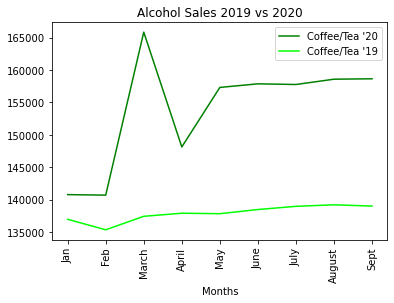

In [15]:
#comparing alcohol 2020 to 2019 (Siara is working more in depth with this data so I wont do much else other than graph atm)

alcohol20, = plt.plot(months, bev_df.loc['          Alcoholic beverages purchased for off-premises consumption',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="green", label="Coffee/Tea '20")

alcohol19, = plt.plot(months, bev_df.loc['          Alcoholic beverages purchased for off-premises consumption',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="lime", label="Coffee/Tea '19")
# Create a legend for our chart
plt.legend(handles=[alcohol20,alcohol19], loc="best")
plt.title("Alcohol Sales 2019 vs 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()